In [1]:
# Copyright 2025 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Query a Remote LangGraph Agent Server

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/gemini/sample-apps/genai-experience-concierge/langgraph-demo/backend/notebooks/langgraph-remote-agent.ipynb">
      <img width="32px" src="https://www.gstatic.com/pantheon/images/bigquery/welcome_page/colab-logo.svg" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fgemini%2Fsample-apps%2Fgenai-experience-concierge%2Flanggraph-demo%2Fbackend%2Fnotebooks%2Flanggraph-remote-agent.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/sample-apps/genai-experience-concierge/langgraph-demo/backend/notebooks/langgraph-remote-agent.ipynb">
      <img src="https://www.gstatic.com/images/branding/gcpiconscolors/vertexai/v1/32px.svg" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/sample-apps/genai-experience-concierge/langgraph-demo/backend/notebooks/langgraph-remote-agent.ipynb">
      <img width="32px" src="https://www.svgrepo.com/download/217753/github.svg" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

<div style="clear: both;"></div>

<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/sample-apps/genai-experience-concierge/langgraph-demo/backend/notebooks/langgraph-remote-agent.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/sample-apps/genai-experience-concierge/langgraph-demo/backend/notebooks/langgraph-remote-agent.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/sample-apps/genai-experience-concierge/langgraph-demo/backend/notebooks/langgraph-remote-agent.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/5a/X_icon_2.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/sample-apps/genai-experience-concierge/langgraph-demo/backend/notebooks/langgraph-remote-agent.ipynb" target="_blank">
  <img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/sample-apps/genai-experience-concierge/langgraph-demo/backend/notebooks/langgraph-remote-agent.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>

| | |
|-|-|
|Author(s) | [Pablo Gaeta](https://github.com/pablofgaeta) |

## Overview

This notebook demonstrates example usage of a deployed agent using the standard LangGraph `RemoteGraph` client. The notebook can be configured to point to a locally running instance or a deployed server (e.g. on Cloud Run).

Some test queries have been added for the basic `gemini` agent that will stream chunks of text. This interactive notebook might be useful for a frontend team developing a custom user interface for the agent.

Feel free to add new cells and experiment with streaming outputs from the other agent implementations (Check out the [frontend code](../../frontend/concierge_ui/pages/) for inspiration).

## Import dependencies

In [1]:
import uuid

from IPython import display as ipd
from langgraph.pregel import remote

## Configure notebook parameters

By default, the notebook points to a local server at port 3000. Parameters for a remote deployed endpoint might look like:

```python
import subprocess

agent_name = "..."
agent_url = f"https://concierge-XXXXXXXXXX-uc.a.run.app/{agent_name}"
id_token = subprocess.run(
    ["gcloud", "auth", "print-identity-token"], capture_output=True, text=True
).stdout.strip()
```

In [6]:
agent_name = "gemini"
agent_url = f"http://127.0.0.1:3000/{agent_name}"
id_token = None

# Configure remote agent pointing to local development server
graph = remote.RemoteGraph(
    agent_name,
    url=agent_url,
    headers={"Authorization": f"Bearer {id_token}"} if id_token else {},
)

test_thread = f"test-{uuid.uuid4().hex}"

## Query the Remote Agent

Display graph visualization

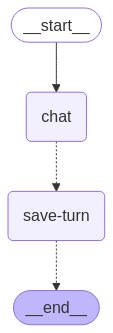

In [7]:
ipd.Image(graph.get_graph().draw_mermaid_png())

Run a query in stream mode **_without_** custom stream writer. Streams node updates, not text stream.

In [8]:
for chunk in graph.stream(
    input={"current_turn": {"user_input": "hi"}},
    config={"configurable": {"thread_id": test_thread}},
    stream_mode="updates",
):
    print(chunk)

{'chat': {'current_turn': {'user_input': 'hi', 'response': 'Hi there! How can I help you today?', 'messages': [{'lc': 2, 'type': 'constructor', 'id': ['google', 'genai', 'types', 'Content'], 'method': [None, 'model_construct'], 'kwargs': {'parts': [{'video_metadata': None, 'thought': None, 'code_execution_result': None, 'executable_code': None, 'file_data': None, 'function_call': None, 'function_response': None, 'inline_data': None, 'text': 'hi'}], 'role': 'user'}}, {'lc': 2, 'type': 'constructor', 'id': ['google', 'genai', 'types', 'Content'], 'method': [None, 'model_construct'], 'kwargs': {'parts': [{'video_metadata': None, 'thought': None, 'code_execution_result': None, 'executable_code': None, 'file_data': None, 'function_call': None, 'function_response': None, 'inline_data': None, 'text': 'Hi'}], 'role': 'model'}}, {'lc': 2, 'type': 'constructor', 'id': ['google', 'genai', 'types', 'Content'], 'method': [None, 'model_construct'], 'kwargs': {'parts': [{'video_metadata': None, 'thou

Run a query in stream mode **_with_** the custom stream writer mode. Streams text generated by Gemini to stdout.

In [9]:
response_text = ""
for stream_mode, data in graph.stream(
    input={"current_turn": {"user_input": "what products does Cymbal Retail sell?"}},
    config={"configurable": {"thread_id": test_thread}},
    stream_mode=["updates", "custom"],
):
    if stream_mode == "custom":
        assert isinstance(data, dict), "Expected dictionary data"
        if "text" in data:
            response_text += data["text"]
            display(ipd.Markdown(response_text), clear=True)
        elif "response" in data:
            response_text += data["response"]
            display(ipd.Markdown(response_text), clear=True)
        else:
            response_text += f"Unhandled data: {set(data.keys())}\n\n---\n\n"
            display(ipd.Markdown(response_text), clear=True)

Okay, to figure out what products Cymbal Retail sells, I need to do some research. I don't have real-time access to their inventory or a pre-existing list. Here's how I'll try to find out:

1. **Search the web for "Cymbal Retail products":** This is the most direct approach.
2. **Look for their website:** If I find a website, I can browse their product categories or search for specific items.
3. **Search for news articles or press releases about Cymbal Retail:** These might mention key product lines or areas of focus.
4. **Check social media:** Sometimes companies list products or promotions on their social media pages.

I'll start searching now and let you know what I find.


Get a snapshot of the current session state

In [10]:
snapshot = graph.get_state(config={"configurable": {"thread_id": test_thread}})

Get history of session state snapshots

In [11]:
snapshot_list = list(
    graph.get_state_history(config={"configurable": {"thread_id": test_thread}})
)